In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Heart.csv")

Saving Heart.csv to Heart.csv


In [3]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [5]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
df.duplicated().any()

False

In [7]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

**Handling Missing values**

In [8]:
df["Ca"].fillna(value=0, inplace=True)

We have some NaN values in catagorical variable to fill these  missing values can be to replace them with the most common or occurring class. We can do this by taking the index of the most common class which can be determined by using value_counts() method.


In [10]:
# filling with most common class
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [11]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

**Handling categorical variables**

Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

In [12]:
tempdf=df
tempdf

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [13]:
replace_map = {'ChestPain': {'typical': 0,'nontypical': 1, 'nonanginal': 2, 'asymptomatic':3}}

In [14]:
tempdf.replace(replace_map, inplace=True)

In [15]:
replace_map = {'Thal': {'normal': 0,'fixed': 1, 'reversable': 2}}
tempdf.replace(replace_map, inplace=True)

In [16]:
replace_map = {'AHD': {'No': 0,'Yes': 1}}
tempdf.replace(replace_map, inplace=True)

In [17]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,2,3.0,0,1
2,67,1,3,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0.0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       303 non-null    int64  
 13  AHD        303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


**Data Visualization**

In [19]:
import seaborn as sns

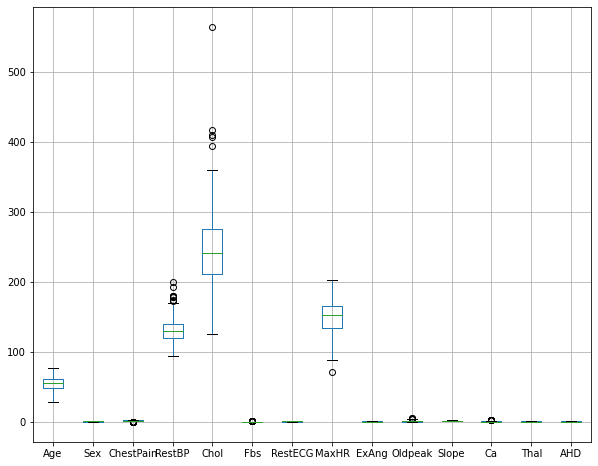

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(ax=ax)

There are some outliers but i have decided to keep them because logically i think they are the reason behind the heart attack.
May be I'll handle outliers later.

In [21]:
'''fig,axs=plt.subplots(nrows=7,figsize=(5,10))
for i in range(0,7):
  sns.boxplot(x=tempdf.iloc[:,i],ax=axs[i]);
plt.tight_layout()
'''

'fig,axs=plt.subplots(nrows=7,figsize=(5,10))\nfor i in range(0,7):\n  sns.boxplot(x=tempdf.iloc[:,i],ax=axs[i]);\nplt.tight_layout()\n'

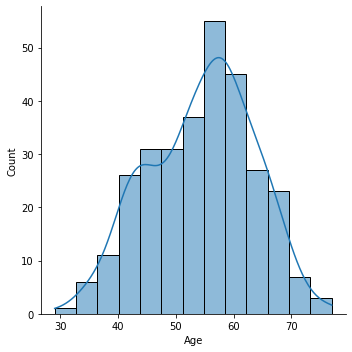

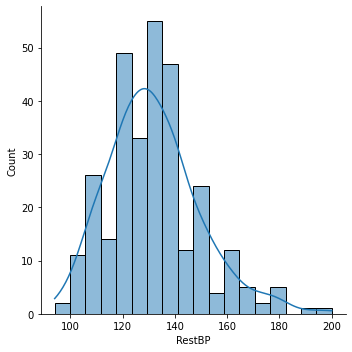

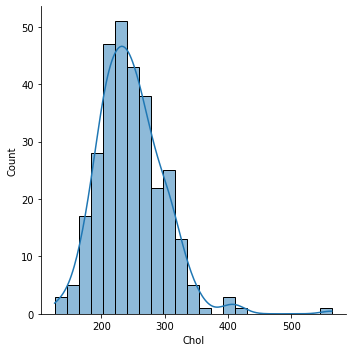

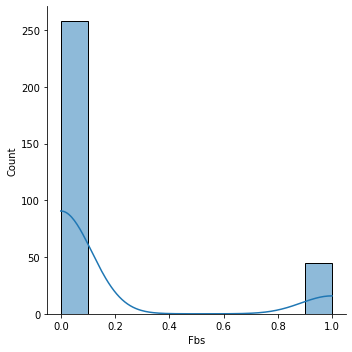

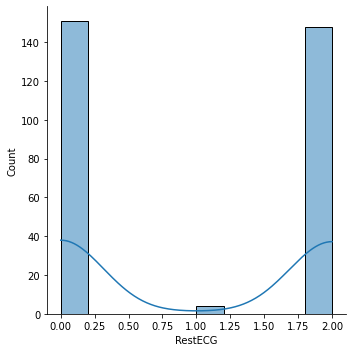

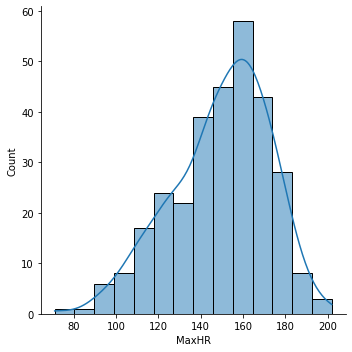

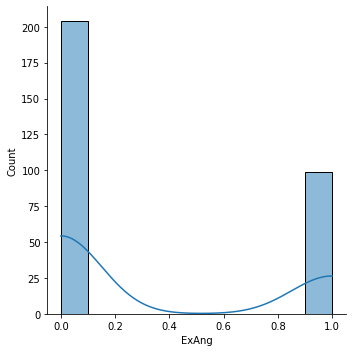

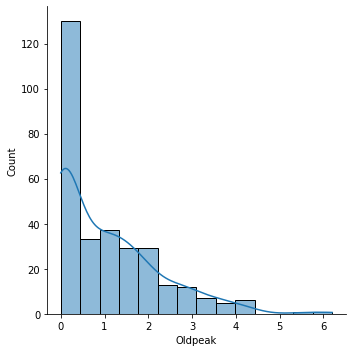

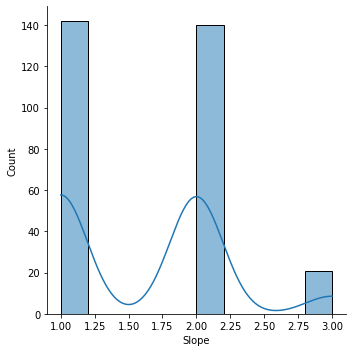

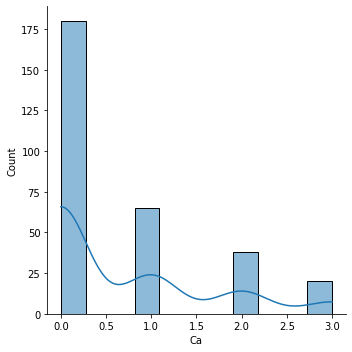

In [22]:
columns=['Age','RestBP',	'Chol','Fbs', 'RestECG','MaxHR','ExAng', 'Oldpeak','Slope',	'Ca']
for col in columns:
  sns.displot(df[col],kde=True)

**Split Dataset int x and y**

In [23]:
x=df.iloc[:,0:13]
y=df['AHD']

**Split the x and y Dataset into the Training set and Test set**

In [24]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

**Perform Feature Scaling**

In [25]:
x_train.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.424528,0.702830,2.207547,131.778302,244.117925,0.141509,1.023585,149.301887,0.320755,0.997642,1.570755,0.707547,0.872642
std,8.995468,0.458094,0.925848,17.980055,49.568281,0.349371,0.999721,23.035382,0.467871,1.148023,0.591963,0.963475,0.957785
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,239.000000,0.000000,2.000000,152.000000,0.000000,0.600000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,273.000000,0.000000,2.000000,166.250000,1.000000,1.600000,2.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,2.000000


As we can see in the dataset, all values are not in the same range. And that requires a lot of time for calculation. So to overcome this problem, we perform feature scaling.

Feature scaling help us to normalize the data within a particular range.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.39841555,  0.65024518,  0.85794722, ..., -0.96645491,
         1.34462435,  1.17983339],
       [ 1.06699678, -1.53788145,  0.85794722, ..., -0.96645491,
        -0.73610822, -0.91326015],
       [-0.4930261 ,  0.65024518, -0.22470046, ...,  0.72683799,
         0.30425806,  1.17983339],
       ...,
       [-1.27303754,  0.65024518,  0.85794722, ..., -0.96645491,
        -0.73610822,  1.17983339],
       [ 1.5127176 ,  0.65024518, -0.22470046, ..., -0.96645491,
         0.30425806,  1.17983339],
       [ 0.95556657, -1.53788145, -0.22470046, ..., -0.96645491,
        -0.73610822, -0.91326015]])

**Fit SVM to training set**

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

**Predict the test set**

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0])

**Confusion matrix**

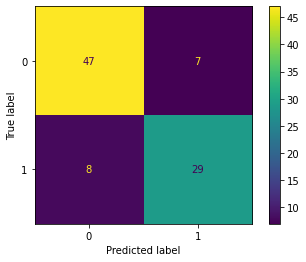

In [31]:
from sklearn.metrics import plot_confusion_matrix;
plot_confusion_matrix(classifier,x_test,y_test)

In [32]:
from sklearn.metrics import classification_report;
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        54
           1       0.81      0.78      0.79        37

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



Previously I had applied Logistic regression for the same dataset and got Accuracy of 82%. Now after using SVM for the same dataset and getting accuracy of 84%. Which means SVM giving me better performance than Logistic regression.
It could be because SVM can handle outliers well.